In [1]:
## import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
import warnings
warnings.filterwarnings(action= 'ignore')

### Step 1: Import the dataset and  usual data analysis steps

In [2]:
##read dataset
df = pd.read_csv('../datasets/wallmart_dataset.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302057 entries, 0 to 302056
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     302057 non-null  int64  
 1   Product_ID                  302057 non-null  object 
 2   Gender                      302057 non-null  object 
 3   Age                         302057 non-null  object 
 4   Occupation                  302056 non-null  float64
 5   City_Category               302056 non-null  object 
 6   Stay_In_Current_City_Years  302056 non-null  object 
 7   Marital_Status              302056 non-null  float64
 8   Product_Category            302056 non-null  float64
 9   Purchase                    302056 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 23.0+ MB


In [4]:
## Looks like features (Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase) 
## have 1 missign values.
    

## Step2 : Detect Null values & Outliers 

In [80]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,3.020570e+05,302056.000000,302056.000000,302056.000000,302056.000000
mean,1.002957e+06,8.083773,0.409090,5.291966,9322.003741
std,1.706017e+03,6.523134,0.491667,3.747570,4973.841161
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001466e+06,2.000000,0.000000,1.000000,5865.000000
50%,1.002992e+06,7.000000,0.000000,5.000000,8060.000000
75%,1.004351e+06,14.000000,1.000000,8.000000,12063.250000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


In [6]:
##check for null values
df.isna().sum()

##observations : Features (Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase)
## have 1 null values and other features have ZERO NULL values.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [7]:
# Calculating praportion missing data
for i in df.columns:
    null_rate = np.round(df[i].isna().sum() / len(i),2)
    print("{} null rate : {}".format(i,null_rate))

User_ID null rate : 0.0
Product_ID null rate : 0.0
Gender null rate : 0.0
Age null rate : 0.0
Occupation null rate : 0.1
City_Category null rate : 0.08
Stay_In_Current_City_Years null rate : 0.04
Marital_Status null rate : 0.07
Product_Category null rate : 0.06
Purchase null rate : 0.12


In [8]:
df_male = df.loc[df['Gender']=='M']
df_female = df.loc[df['Gender']=='F']

In [9]:
df_male

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,15227.0
6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,19215.0
7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15854.0
8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,15686.0
...,...,...,...,...,...,...,...,...,...,...
302034,1004480,P00201342,M,26-35,0.0,B,1,0.0,1.0,4159.0
302035,1004480,P00249542,M,26-35,0.0,B,1,0.0,1.0,3979.0
302036,1004481,P00145042,M,26-35,18.0,C,2,1.0,1.0,7962.0
302037,1004481,P00014042,M,26-35,18.0,C,2,1.0,1.0,7842.0


<Axes: xlabel='Purchase'>

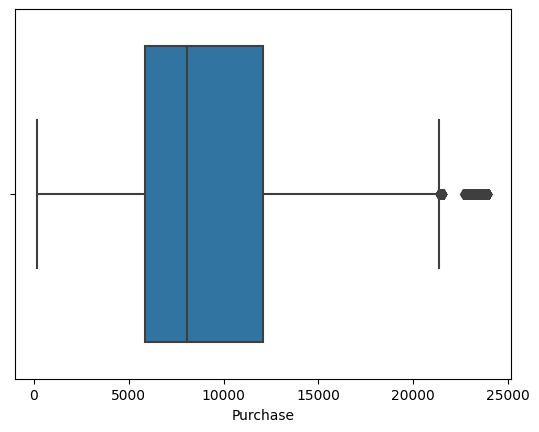

In [10]:
sns.boxplot(data = df,x = 'Purchase')

In [11]:
df['Purchase'].describe()

count    302056.000000
mean       9322.003741
std        4973.841161
min         185.000000
25%        5865.000000
50%        8060.000000
75%       12063.250000
max       23961.000000
Name: Purchase, dtype: float64

<Axes: >

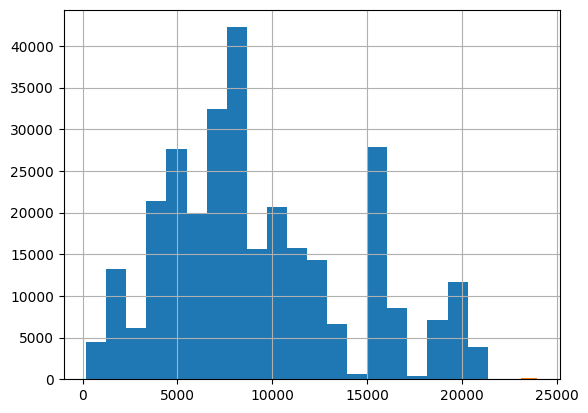

In [12]:
def detect_outliers(d,col_name):
    iqr = d.quantile(0.75) - d.quantile(0.25)
    lower = d.quantile(0.25) - 1.5 * iqr
    higher = d.quantile(0.75) + 1.5*iqr
    return df.loc[(d > higher) | (d < lower)][col_name]
ol = detect_outliers(df['Purchase'],col_name = 'Purchase')
df.loc[~df.index.isin(ol.index)]['Purchase'].hist(bins=20)
ol.hist(bins=30)
## uncommen to get the list of outliers
# print("outliers are : {}",format((list(ol))))

# Observations :-
### From the bos plot we can see 'Pruchase' has outliers.
1. 'Purchase' has 1507 outliers
2. The above plots shows Ouliers(Orange color) and Normal value(Blue color)

## Data Exploration

<Axes: xlabel='Gender', ylabel='count'>

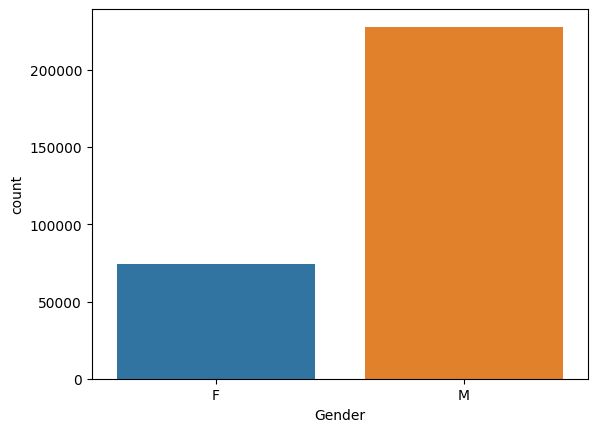

In [13]:
sns.countplot(data = df,x='Gender')

In [14]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

## Observation : 

<Axes: xlabel='Age', ylabel='count'>

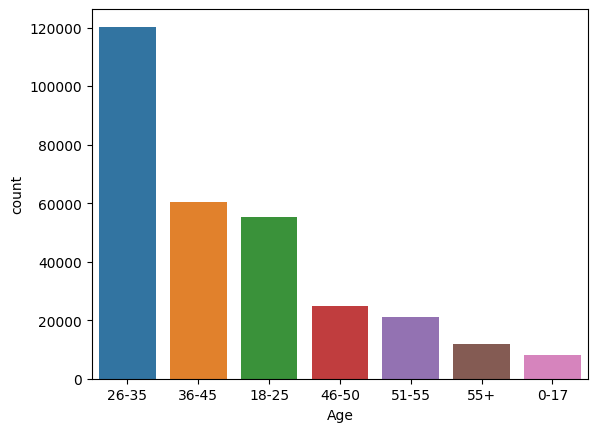

In [15]:
sns.countplot(data=df,x='Age',order=df['Age'].value_counts().index)

In [16]:
## Observation :
# 1. Most of the purchase is done by 26-35 age people.

## Bi-Variate analysis

<Axes: xlabel='Gender', ylabel='Purchase'>

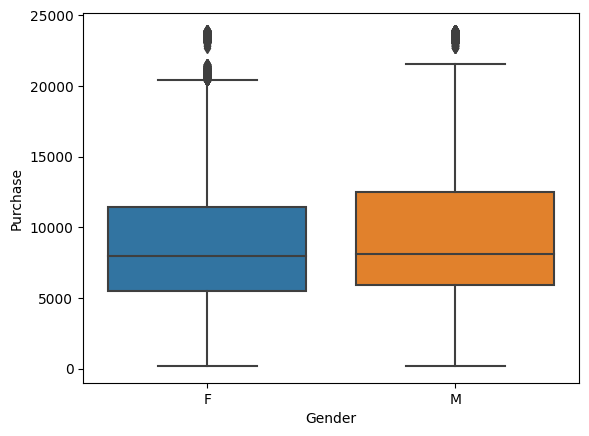

In [17]:
sns.boxplot(data=df,x = 'Gender',y='Purchase')

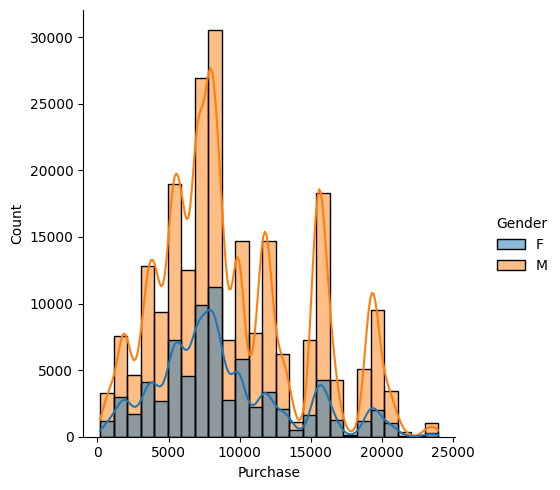

In [18]:
sns.displot(data =df,x = 'Purchase',bins = 25,hue = 'Gender',kde = True)

In [19]:
print("## Male Stats ##")
display(df_male['Purchase'].describe())
print()
print("## Female Stats ##")
display(df_female['Purchase'].describe())

## Male Stats ##


count    227944.000000
mean       9490.067249
std        5045.806495
min         185.000000
25%        5899.000000
50%        8109.000000
75%       12497.000000
max       23961.000000
Name: Purchase, dtype: float64


## Female Stats ##


count    74112.000000
mean      8805.095976
std       4708.245244
min        186.000000
25%       5460.000000
50%       7931.000000
75%      11438.000000
max      23948.000000
Name: Purchase, dtype: float64

In [20]:
## Age wise sepration b/w Male and Female
display(df_male['Age'].value_counts())
print()
display(df_female['Age'].value_counts())

Age
26-35    92746
36-45    45581
18-25    41677
46-50    17675
51-55    15740
55+       9068
0-17      5457
Name: count, dtype: int64

Age
26-35    27553
36-45    14773
18-25    13647
46-50     7184
51-55     5465
55+       2772
0-17      2719
Name: count, dtype: int64

Text(0, 0.5, 'Count')

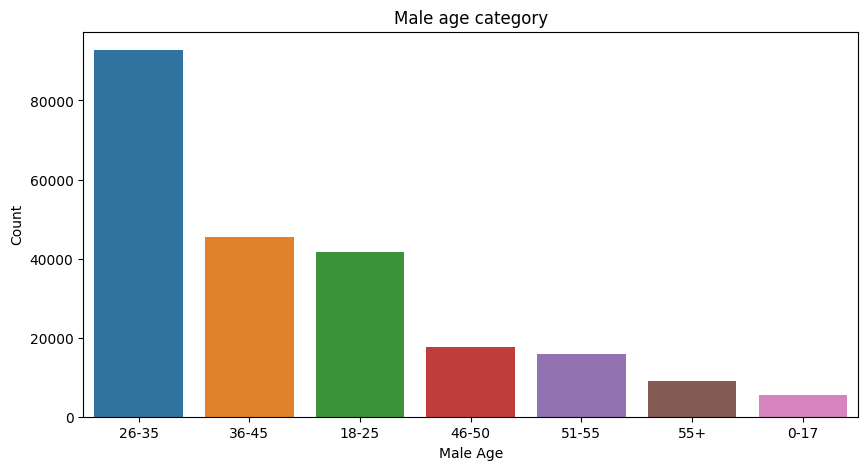

In [21]:
plt.figure(figsize=(10,5))
plt.title('Male age category')
sns.countplot(data=df_male,x='Age',order=df['Age'].value_counts().index)
plt.xlabel('Male Age')
plt.ylabel("Count")

Text(0, 0.5, 'Count')

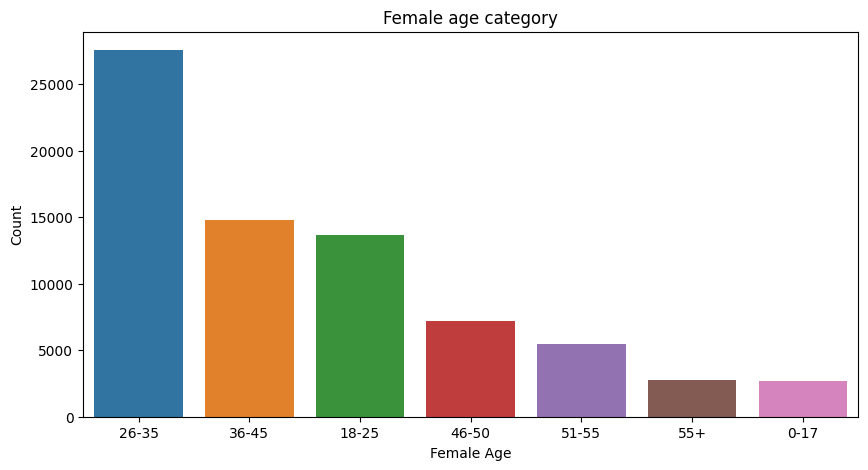

In [22]:
plt.figure(figsize=(10,5))
plt.title('Female age category')
sns.countplot(data=df_female,x='Age',order=df['Age'].value_counts().index)
plt.xlabel('Female Age')
plt.ylabel("Count")

<Axes: xlabel='Purchase', ylabel='Density'>

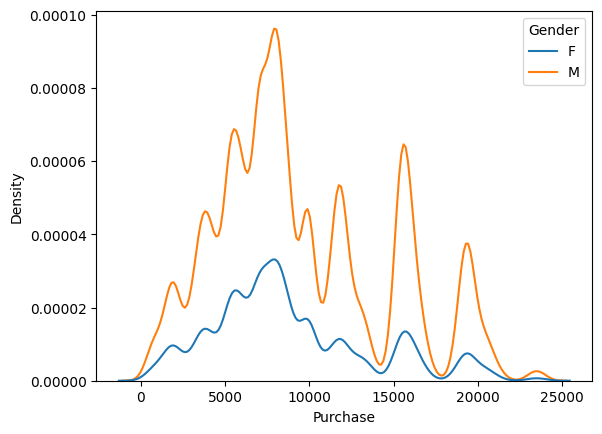

In [23]:
sns.kdeplot(data =df,x = 'Purchase',hue = 'Gender')

### Observations
1. Number of transactions by 'Men' : 227944
2. Mean of transactions by 'Men' : 9490 i.e., On an Average each Men spends 9437 per
transaction on purchase.
3. Numbe rof transation ny 'Female' : 74112
4. Mean of transation by 'Female' : 8805 i.e., On an Average each Female spends 8734per transaction on pruchase.

# CLT

## 1.1 Confidence intervals and distribution of the mean of the expenses by female and male customers

### 90% Confidence Interval : For male and Female who purchases 

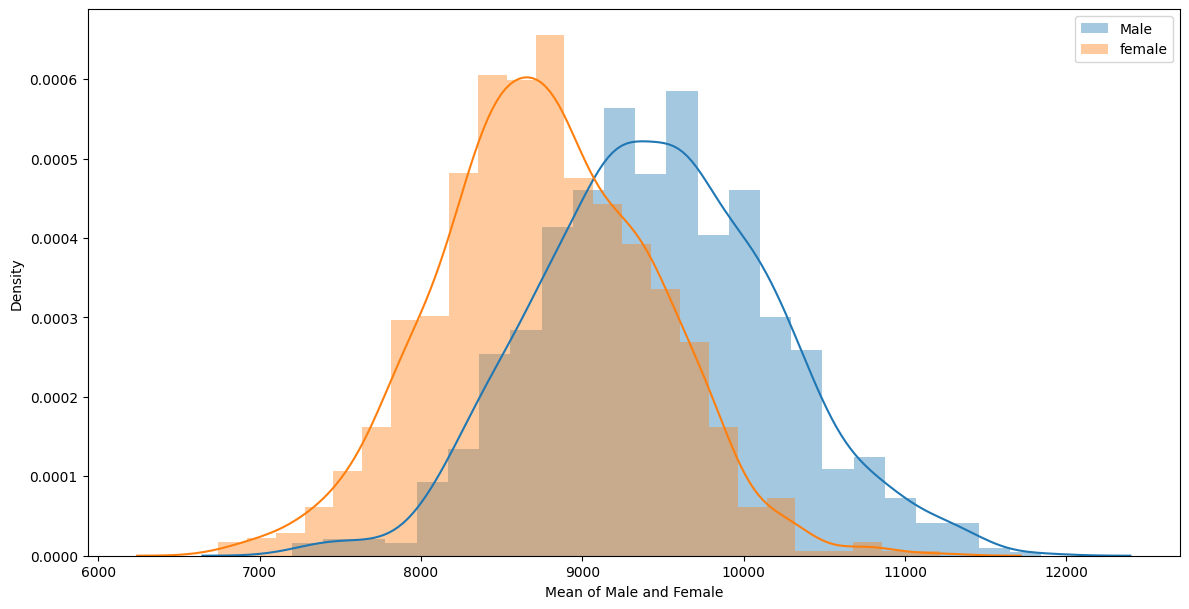


90% Confidence interval for men : [8304.4,10739.83]
90% Confidence interval for female : [nan,nan]


In [24]:
sample_size = 50
male_bootstrap_sample_mean = []
for i in range(1,1000):
    male_bootstrap_sample = np.random.choice(df_male['Purchase'],size = sample_size)
    bootstrap_sample_mean = male_bootstrap_sample.mean()
    male_bootstrap_sample_mean.append(bootstrap_sample_mean)
female_bootstrap_sample_mean = []
for i in range(1,1000):
    female_bootstrap_sample = np.random.choice(df_female['Purchase'],size = sample_size)
    sample_mean = female_bootstrap_sample.mean()
    female_bootstrap_sample_mean.append(sample_mean)
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(male_bootstrap_sample_mean,label = 'Male')
sns.distplot(female_bootstrap_sample_mean,label = 'female')
ax.legend()
plt.tight_layout()
plt.xlabel('Mean of Male and Female')
plt.show()

print()
## male confidence interval calculation
male_ci_lower = round(np.percentile(male_bootstrap_sample_mean,5.0),2)
male_ci_higher = round(np.percentile(male_bootstrap_sample_mean,95.0),2)
print(f"90% Confidence interval for men : [{male_ci_lower},{male_ci_higher}]")


## female confidence interval calculation
female_ci_lower = round(np.percentile(female_bootstrap_sample_mean,5.0),2)
female_ci_higher = round(np.percentile(female_bootstrap_sample_mean,95.0),2)
print(f"90% Confidence interval for female : [{female_ci_lower},{female_ci_higher}]")


## 95% Confidence Interval : For male and Female who purchased

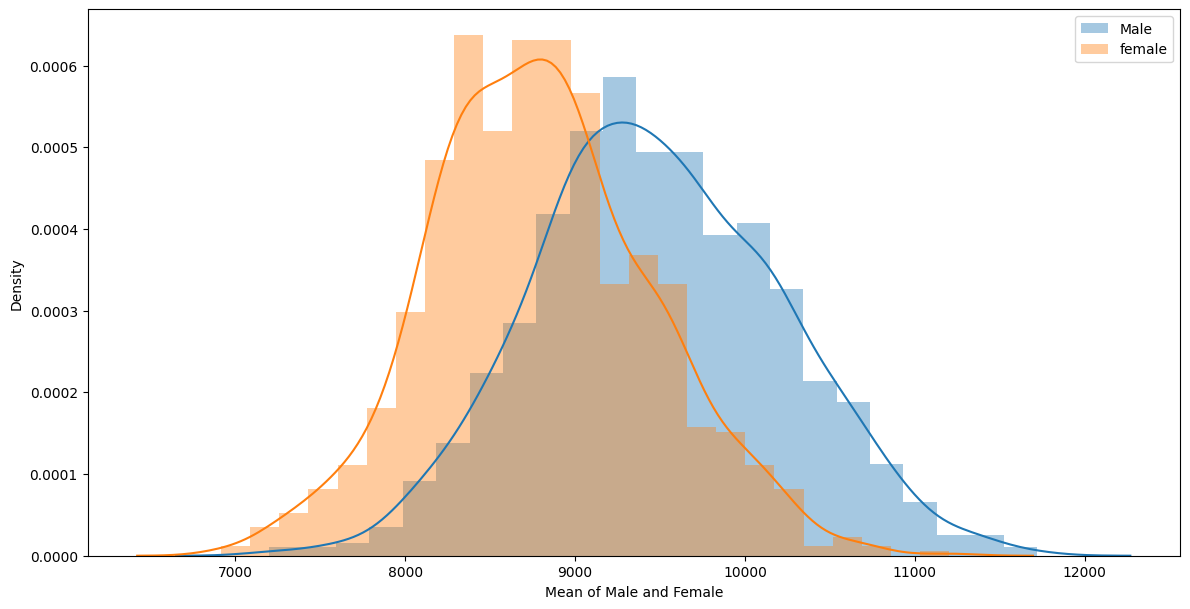


95% Confidence interval for men : [8112.28,10931.2]
95% Confidence interval for female : [nan,nan]


In [25]:
sample_size = 50
male_bootstrap_sample_mean = []
for i in range(1,1000):
    male_bootstrap_sample = np.random.choice(df_male['Purchase'],size = sample_size)
    bootstrap_sample_mean = male_bootstrap_sample.mean()
    male_bootstrap_sample_mean.append(bootstrap_sample_mean)
female_bootstrap_sample_mean = []
for i in range(1,1000):
    female_bootstrap_sample = np.random.choice(df_female['Purchase'],size = sample_size)
    sample_mean = female_bootstrap_sample.mean()
    female_bootstrap_sample_mean.append(sample_mean)
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(male_bootstrap_sample_mean,label = 'Male')
sns.distplot(female_bootstrap_sample_mean,label = 'female')
ax.legend()
plt.tight_layout()
plt.xlabel('Mean of Male and Female')
plt.show()

print()
## male confidence interval calculation
male_ci_lower = round(np.percentile(male_bootstrap_sample_mean,2.5),2)
male_ci_higher = round(np.percentile(male_bootstrap_sample_mean,97.5),2)
print(f"95% Confidence interval for men : [{male_ci_lower},{male_ci_higher}]")


## female confidence interval calculation
female_ci_lower = round(np.percentile(female_bootstrap_sample_mean,2.5),2)
female_ci_higher = round(np.percentile(female_bootstrap_sample_mean,97.5),2)
print(f"95% Confidence interval for female : [{female_ci_lower},{female_ci_higher}]")


## 99% Confidence Interval : For male and Female who purchased

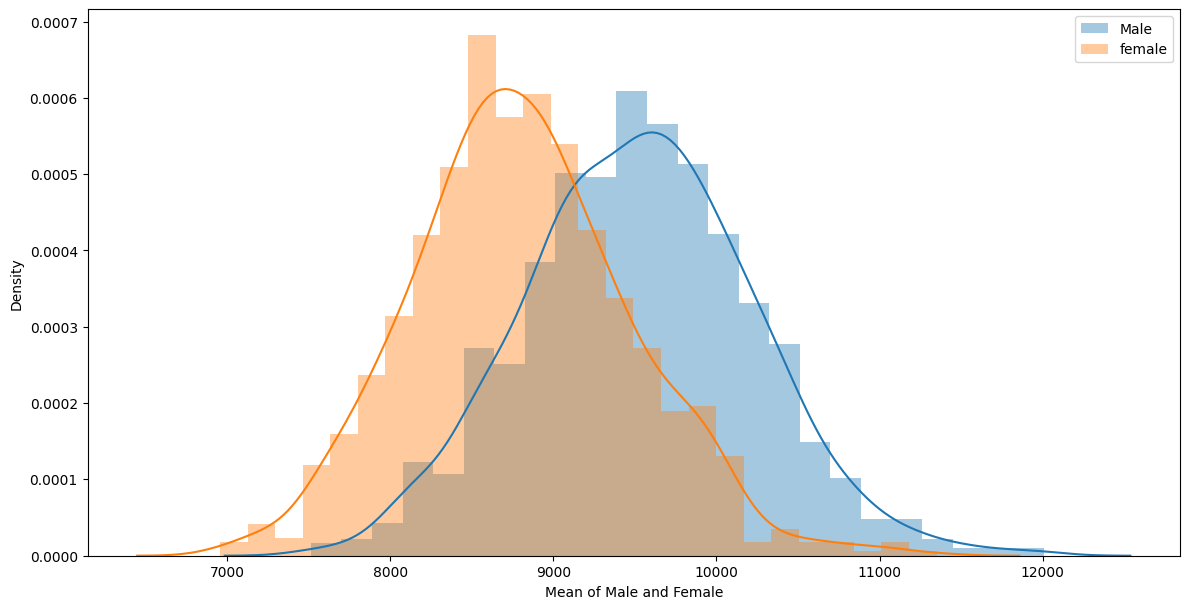


99% Confidence interval for men : [7833.58,11479.89]
99% Confidence interval for female : [nan,nan]


In [26]:
sample_size = 50
male_bootstrap_sample_mean = []
for i in range(1,1000):
    male_bootstrap_sample = np.random.choice(df_male['Purchase'],size = sample_size)
    bootstrap_sample_mean = male_bootstrap_sample.mean()
    male_bootstrap_sample_mean.append(bootstrap_sample_mean)
female_bootstrap_sample_mean = []
for i in range(1,1000):
    female_bootstrap_sample = np.random.choice(df_female['Purchase'],size = sample_size)
    sample_mean = female_bootstrap_sample.mean()
    female_bootstrap_sample_mean.append(sample_mean)
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(male_bootstrap_sample_mean,label = 'Male')
sns.distplot(female_bootstrap_sample_mean,label = 'female')
ax.legend()
plt.tight_layout()
plt.xlabel('Mean of Male and Female')
plt.show()

print()
## male confidence interval calculation
male_ci_lower = round(np.percentile(male_bootstrap_sample_mean,0.5),2)
male_ci_higher = round(np.percentile(male_bootstrap_sample_mean,99.5),2)
print(f"99% Confidence interval for men : [{male_ci_lower},{male_ci_higher}]")


## female confidence interval calculation
female_ci_lower = round(np.percentile(female_bootstrap_sample_mean,0.5),2)
female_ci_higher = round(np.percentile(female_bootstrap_sample_mean,99.5),2)
print(f"99% Confidence interval for female : [{female_ci_lower},{female_ci_higher}]")


## Observations :
1. 90% Confidence interval for men : [8312.17,10688.16]
2. 90% Confidence interval for female : [7678.33,9864.6]
3. 95% Confidence interval for men : [8009.27,10881.0]
4. 95% Confidence interval for female : [7634.08,10064.58]
5. 99% Confidence interval for men : [7632.5,11435.58]
6. 99% Confidence interval for female : [7308.02,10560.99]
## Conclusion :
Since, the 90,95,99 Confidence intervals are overlapping. We cannot say that males are spending
more as compared to Females and vice versa.

## 1.2 Confidence intervals and distribution of the mean of the expenses by Married and Unmarried customers

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

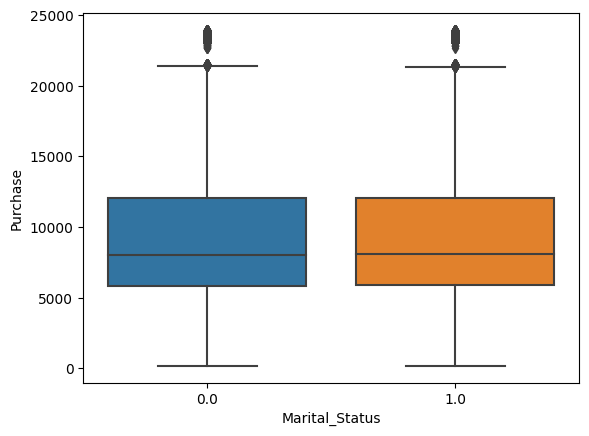

In [27]:
sns.boxplot(x='Marital_Status', y='Purchase', data=df)

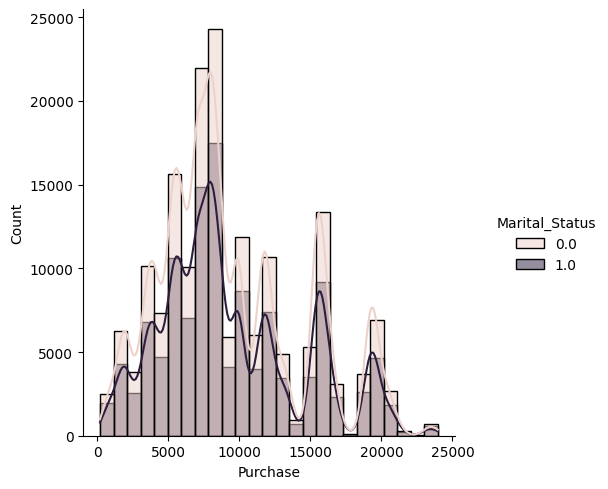

In [28]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Marital_Status', data=df )

## 90% Confidence Interval of the expenses by Married and Unmarried customers

In [29]:
married_sample = df.loc[df['Marital_Status'] == 1]
unmarried_sample = df.loc[df['Marital_Status'] == 0]

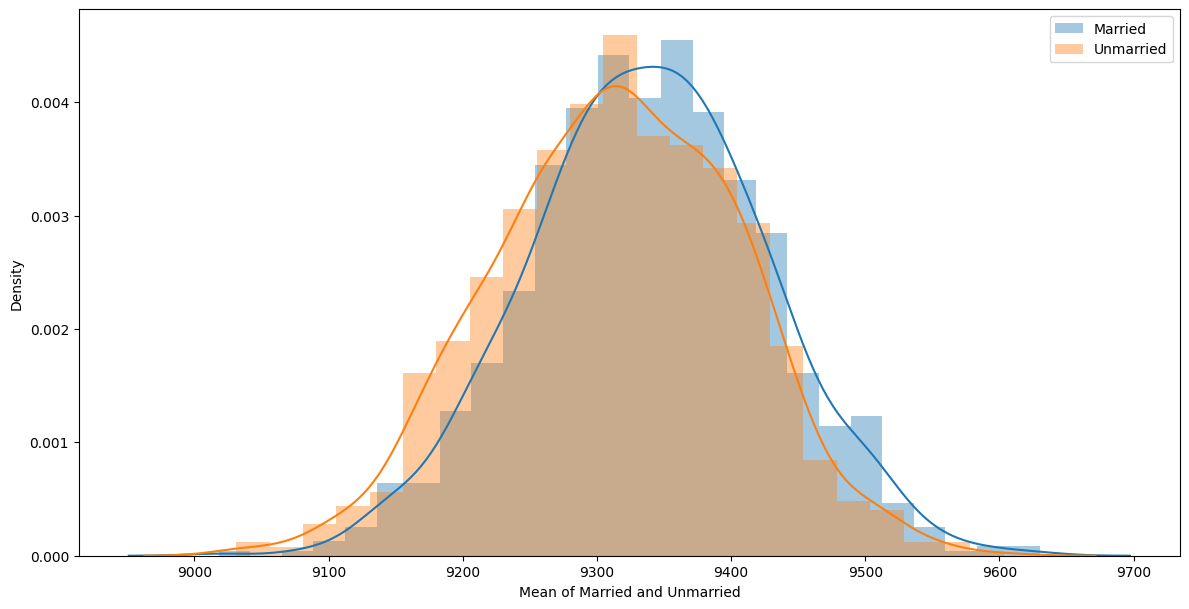


90% Confidence interval for married : [7833.58,11479.89]
90% Confidence interval for unmarried : [9164.56,9453.48]


In [30]:
sample_size = 3000
married_bootstrap_sample_mean = []
for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(married_sample['Purchase'],size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    married_bootstrap_sample_mean.append(bootstrap_sample_mean)
unmarried_bootstrap_sample_mean = []
for i in range(1,1000):
    unmarried_bootstrap_sample = np.random.choice(unmarried_sample['Purchase'],size = sample_size)
    sample_mean = unmarried_bootstrap_sample.mean()
    unmarried_bootstrap_sample_mean.append(sample_mean)
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(married_bootstrap_sample_mean,label = 'Married')
sns.distplot(unmarried_bootstrap_sample_mean,label = 'Unmarried')
ax.legend()
plt.tight_layout()
plt.xlabel('Mean of Married and Unmarried')
plt.show()

print()
## male confidence interval calculation
married_ci_lower = round(np.percentile(married_bootstrap_sample_mean,5.0),2)
married_ci_higher = round(np.percentile(married_bootstrap_sample_mean,95.0),2)
print(f"90% Confidence interval for married : [{male_ci_lower},{male_ci_higher}]")


## female confidence interval calculation
unmarried_ci_lower = round(np.percentile(unmarried_bootstrap_sample_mean,5.0),2)
unmarried_ci_higher = round(np.percentile(unmarried_bootstrap_sample_mean,95.0),2)
print(f"90% Confidence interval for unmarried : [{unmarried_ci_lower},{unmarried_ci_higher}]")


## 95% Confidence Interval of the expenses by Married and Unmarried customers

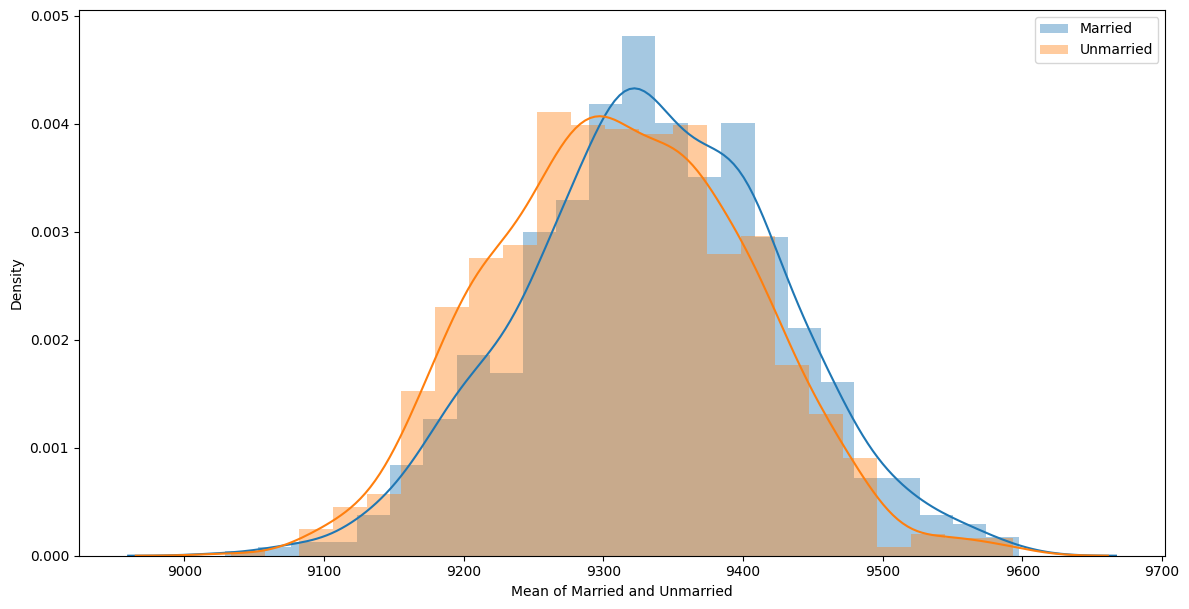


95% Confidence interval for married : [7833.58,11479.89]
95% Confidence interval for unmarried : [9147.49,9482.15]


In [31]:
sample_size = 3000
married_bootstrap_sample_mean = []
for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(married_sample['Purchase'],size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    married_bootstrap_sample_mean.append(bootstrap_sample_mean)
unmarried_bootstrap_sample_mean = []
for i in range(1,1000):
    unmarried_bootstrap_sample = np.random.choice(unmarried_sample['Purchase'],size = sample_size)
    sample_mean = unmarried_bootstrap_sample.mean()
    unmarried_bootstrap_sample_mean.append(sample_mean)
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(married_bootstrap_sample_mean,label = 'Married')
sns.distplot(unmarried_bootstrap_sample_mean,label = 'Unmarried')
ax.legend()
plt.tight_layout()
plt.xlabel('Mean of Married and Unmarried')
plt.show()

print()
## male confidence interval calculation
married_ci_lower = round(np.percentile(married_bootstrap_sample_mean,2.5),2)
married_ci_higher = round(np.percentile(married_bootstrap_sample_mean,97.5),2)
print(f"95% Confidence interval for married : [{male_ci_lower},{male_ci_higher}]")


## female confidence interval calculation
unmarried_ci_lower = round(np.percentile(unmarried_bootstrap_sample_mean,2.5),2)
unmarried_ci_higher = round(np.percentile(unmarried_bootstrap_sample_mean,97.5),2)
print(f"95% Confidence interval for unmarried : [{unmarried_ci_lower},{unmarried_ci_higher}]")


## 99% Confidence Interval of the expenses by Married and Unmarried customers

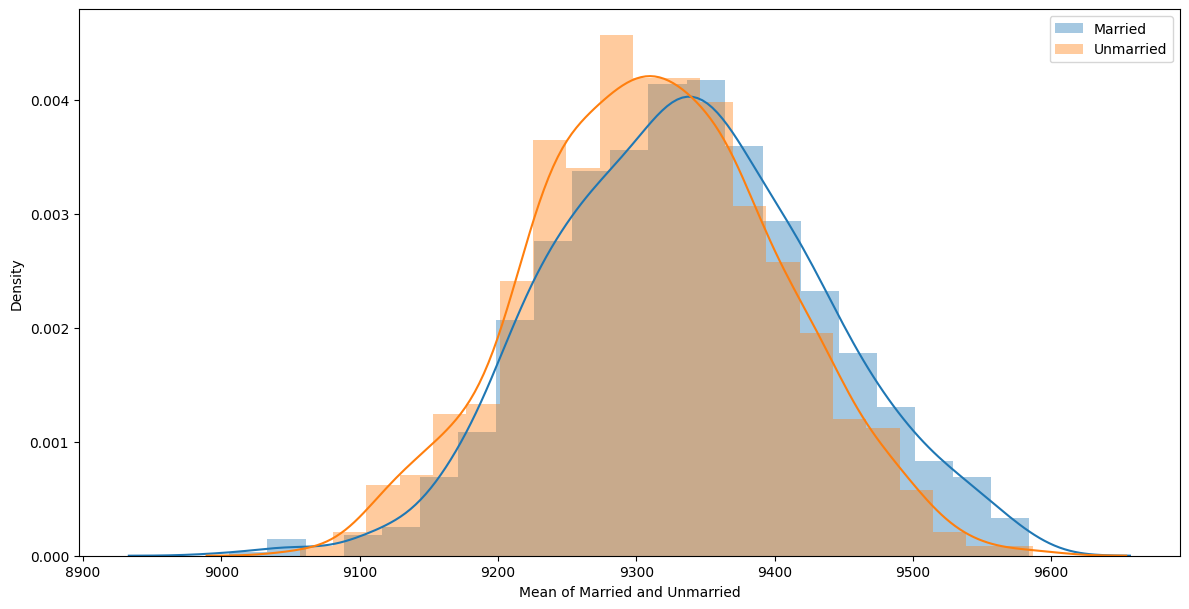


99% Confidence interval for married : [7833.58,11479.89]
99% Confidence interval for unmarried : [9134.17,9487.34]


In [32]:
sample_size = 3000
married_bootstrap_sample_mean = []
for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(married_sample['Purchase'],size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    married_bootstrap_sample_mean.append(bootstrap_sample_mean)
unmarried_bootstrap_sample_mean = []
for i in range(1,1000):
    unmarried_bootstrap_sample = np.random.choice(unmarried_sample['Purchase'],size = sample_size)
    sample_mean = unmarried_bootstrap_sample.mean()
    unmarried_bootstrap_sample_mean.append(sample_mean)
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(married_bootstrap_sample_mean,label = 'Married')
sns.distplot(unmarried_bootstrap_sample_mean,label = 'Unmarried')
ax.legend()
plt.tight_layout()
plt.xlabel('Mean of Married and Unmarried')
plt.show()

print()
## male confidence interval calculation
married_ci_lower = round(np.percentile(married_bootstrap_sample_mean,0.5),2)
married_ci_higher = round(np.percentile(married_bootstrap_sample_mean,99.5),2)
print(f"99% Confidence interval for married : [{male_ci_lower},{male_ci_higher}]")


## female confidence interval calculation
unmarried_ci_lower = round(np.percentile(unmarried_bootstrap_sample_mean,2.5),2)
unmarried_ci_higher = round(np.percentile(unmarried_bootstrap_sample_mean,97.5),2)
print(f"99% Confidence interval for unmarried : [{unmarried_ci_lower},{unmarried_ci_higher}]")


## Observations :
1. 90% Confidence interval for married : [8009.27,10881.0]
2. 90% Confidence interval for unmarried : [9163.61,9478.89]
3. 95% Confidence interval for married : [8009.27,10881.0]
4. 95% Confidence interval for unmarried : [9138.14,9494.14]
5. 99% Confidence interval for married : [8009.27,10881.0]
6. 99% Confidence interval for unmarried : [9152.5,9501.77]

## Conclusion : 
- Since, the 90,95,99 Confidence intervals are overlapping. We cannot say that Married are
spending more as compared to Unmarried and vice versa.

## 1.3 Confidence intervals and distribution of the mean of the expenses by Age

In [33]:
df['Age'].value_counts()

Age
26-35    120299
36-45     60354
18-25     55324
46-50     24859
51-55     21205
55+       11840
0-17       8176
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Purchase'>

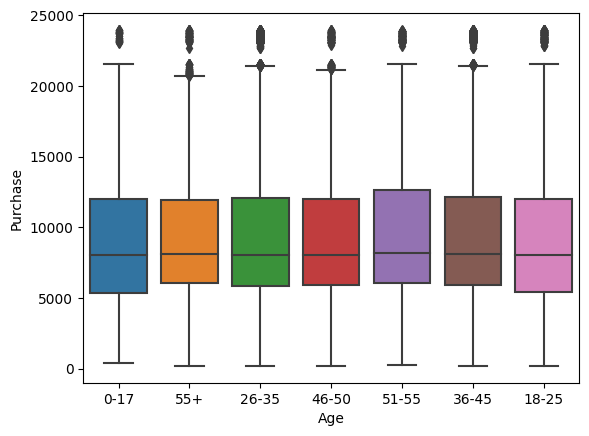

In [34]:
sns.boxplot(x='Age', y='Purchase', data=df)

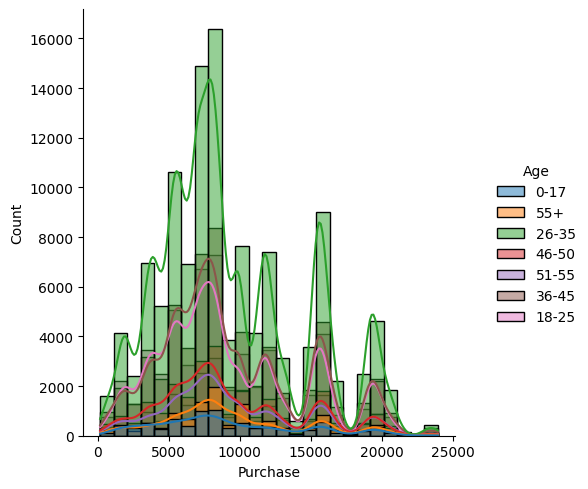

In [35]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Age', data=df )
plt.show()

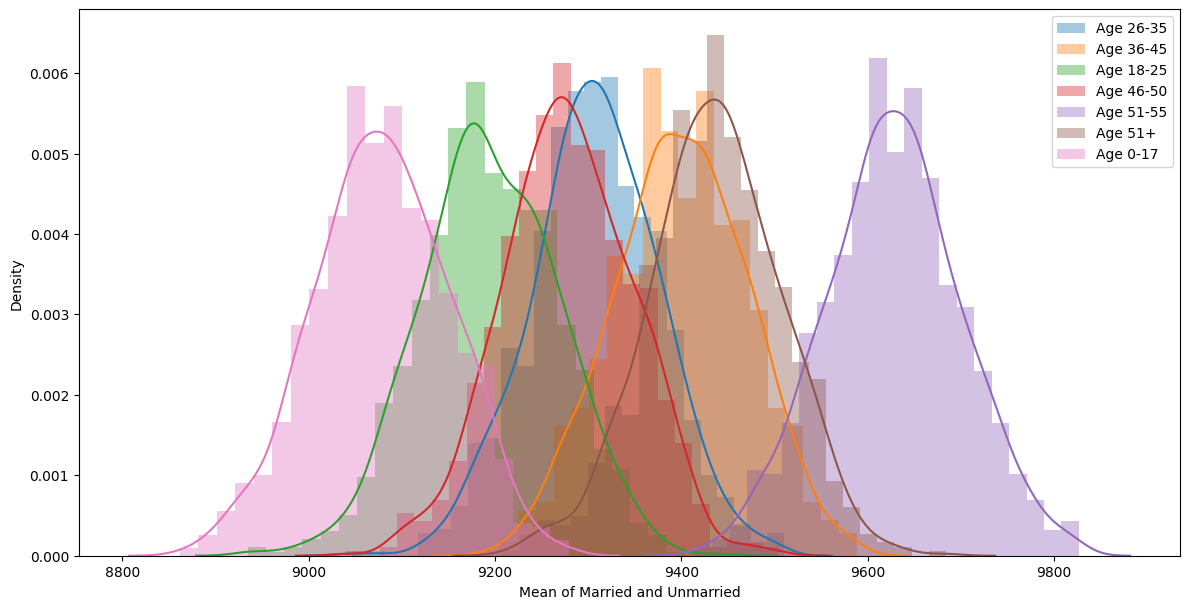

In [86]:
sample_size = 5000
age_group = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

age_26_35_df = df.loc[df['Age'] == age_group[0]]['Purchase']
age_36_45_df = df.loc[df['Age'] == age_group[1]]['Purchase']
age_18_25_df = df.loc[df['Age'] == age_group[2]]['Purchase']
age_46_50_df = df.loc[df['Age'] == age_group[3]]['Purchase']
age_51_55_df = df.loc[df['Age'] == age_group[4]]['Purchase']
age_55_df = df.loc[df['Age'] == age_group[5]]['Purchase']
age_0_17_df = df.loc[df['Age'] == age_group[6]]['Purchase']

age_26_35_lst = []
age_36_45_lst = []
age_18_25_lst = []
age_46_50_lst = []
age_51_55_lst = []
age_55_lst = []
age_0_17_lst = []

for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(age_26_35_df,size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    age_26_35_lst.append(bootstrap_sample_mean)
    
for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(age_36_45_df,size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    age_36_45_lst.append(bootstrap_sample_mean)  

for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(age_18_25_df,size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    age_18_25_lst.append(bootstrap_sample_mean)
       
for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(age_46_50_df,size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    age_46_50_lst.append(bootstrap_sample_mean)   
    
for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(age_51_55_df,size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    age_51_55_lst.append(bootstrap_sample_mean)
    
for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(age_55_df,size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    age_55_lst.append(bootstrap_sample_mean)

for i in range(1,1000):
    married_bootstrap_sample = np.random.choice(age_0_17_df,size = sample_size)
    bootstrap_sample_mean = married_bootstrap_sample.mean()
    age_0_17_lst.append(bootstrap_sample_mean)
    
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(age_26_35_lst,label = 'Age 26-35')
sns.distplot(age_36_45_lst,label = 'Age 36-45')
sns.distplot(age_18_25_lst,label = 'Age 18-25')
sns.distplot(age_46_50_lst,label = 'Age 46-50')
sns.distplot(age_51_55_lst,label = 'Age 51-55')
sns.distplot(age_55_lst,label = 'Age 51+')
sns.distplot(age_0_17_lst,label = 'Age 0-17')
ax.legend()
plt.tight_layout()
plt.xlabel('Mean of Married and Unmarried')
plt.show()

In [ ]:
print(f"90% confidence interval for age agoup :{age_group[0]} is {}")

## 90% Confidence interval

In [87]:

age_26_35_ci_lower = round(np.percentile(age_26_35_lst,5.0),2)
age_26_35_ci_higher = round(np.percentile(age_26_35_lst,95.0),2)
age_36_45_ci_lower = round(np.percentile(age_36_45_lst,5.0),2)
age_36_45_ci_higher = round(np.percentile(age_36_45_lst,95.0),2)
age_18_25_ci_lower = round(np.percentile(age_18_25_lst,5.0),2)
age_18_25_ci_higher = round(np.percentile(age_18_25_lst,95.0),2)
age_46_50_ci_lower = round(np.percentile(age_46_50_lst,5.0),2)
age_46_50_ci_higher = round(np.percentile(age_46_50_lst,95.0),2)
age_51_55_ci_lower = round(np.percentile(age_51_55_lst,5.0),2)
age_51_55_ci_higher = round(np.percentile(age_51_55_lst,95.0),2)
age_55_ci_lower = round(np.percentile(age_55_lst,5.0),2)
age_55_ci_higher = round(np.percentile(age_55_lst,95.0),2)
age_0_17_ci_lower = round(np.percentile(age_0_17_lst,5.0),2)
age_0_17_ci_higher = round(np.percentile(age_0_17_lst,95.0),2)


print(f"90% confidence interval for {age_group[0]} is [{age_26_35_ci_lower},{age_26_35_ci_higher}]")
print(f"90% confidence interval for {age_group[1]} is [{age_36_45_ci_lower},{age_36_45_ci_higher}]")
print(f"90% confidence interval for {age_group[2]} is [{age_18_25_ci_lower},{age_18_25_ci_higher}]")
print(f"90% confidence interval for {age_group[3]} is [{age_46_50_ci_lower},{age_46_50_ci_higher}]")
print(f"90% confidence interval for {age_group[4]} is [{age_51_55_ci_lower},{age_51_55_ci_higher}]")
print(f"90% confidence interval for {age_group[5]} is [{age_55_ci_lower},{age_55_ci_higher}]")
print(f"90% confidence interval for {age_group[6]} is [{age_0_17_ci_lower},{age_0_17_ci_higher}]")


90% confidence interval for 26-35 is [9189.85,9418.97]
90% confidence interval for 36-45 is [nan,nan]
90% confidence interval for 18-25 is [9076.57,9314.36]
90% confidence interval for 46-50 is [9165.17,9389.35]
90% confidence interval for 51-55 is [9505.27,9745.56]
90% confidence interval for 55+ is [9317.68,9548.69]
90% confidence interval for 0-17 is [8957.47,9194.34]


## 95% Confidence interval

In [88]:

age_26_35_ci_lower = round(np.percentile(age_26_35_lst,2.5),2)
age_26_35_ci_higher = round(np.percentile(age_26_35_lst,97.5),2)
age_36_45_ci_lower = round(np.percentile(age_36_45_lst,2.5),2)
age_36_45_ci_higher = round(np.percentile(age_36_45_lst,97.5),2)
age_18_25_ci_lower = round(np.percentile(age_18_25_lst,2.5),2)
age_18_25_ci_higher = round(np.percentile(age_18_25_lst,97.5),2)
age_46_50_ci_lower = round(np.percentile(age_46_50_lst,2.5),2)
age_46_50_ci_higher = round(np.percentile(age_46_50_lst,97.5),2)
age_51_55_ci_lower = round(np.percentile(age_51_55_lst,2.5),2)
age_51_55_ci_higher = round(np.percentile(age_51_55_lst,97.5),2)
age_55_ci_lower = round(np.percentile(age_55_lst,2.5),2)
age_55_ci_higher = round(np.percentile(age_55_lst,97.5),2)
age_0_17_ci_lower = round(np.percentile(age_0_17_lst,2.5),2)
age_0_17_ci_higher = round(np.percentile(age_0_17_lst,97.5),2)


print(f"95% confidence interval for {age_group[0]} is [{age_26_35_ci_lower},{age_26_35_ci_higher}]")
print(f"95% confidence interval for {age_group[1]} is [{age_36_45_ci_lower},{age_36_45_ci_higher}]")
print(f"95% confidence interval for {age_group[2]} is [{age_18_25_ci_lower},{age_18_25_ci_higher}]")
print(f"95% confidence interval for {age_group[3]} is [{age_46_50_ci_lower},{age_46_50_ci_higher}]")
print(f"95% confidence interval for {age_group[4]} is [{age_51_55_ci_lower},{age_51_55_ci_higher}]")
print(f"95% confidence interval for {age_group[5]} is [{age_55_ci_lower},{age_55_ci_higher}]")
print(f"95% confidence interval for {age_group[6]} is [{age_0_17_ci_lower},{age_0_17_ci_higher}]")


95% confidence interval for 26-35 is [9171.98,9441.36]
95% confidence interval for 36-45 is [nan,nan]
95% confidence interval for 18-25 is [9052.17,9337.37]
95% confidence interval for 46-50 is [9135.46,9407.27]
95% confidence interval for 51-55 is [9483.49,9771.42]
95% confidence interval for 55+ is [9297.42,9569.36]
95% confidence interval for 0-17 is [8930.88,9211.76]


## 99% Confidence interval

In [89]:

age_26_35_ci_lower = round(np.percentile(age_26_35_lst,0.5),2)
age_26_35_ci_higher = round(np.percentile(age_26_35_lst,99.5),2)
age_36_45_ci_lower = round(np.percentile(age_36_45_lst,0.5),2)
age_36_45_ci_higher = round(np.percentile(age_36_45_lst,90.5),2)
age_18_25_ci_lower = round(np.percentile(age_18_25_lst,0.5),2)
age_18_25_ci_higher = round(np.percentile(age_18_25_lst,99.5),2)
age_46_50_ci_lower = round(np.percentile(age_46_50_lst,0.5),2)
age_46_50_ci_higher = round(np.percentile(age_46_50_lst,99.5),2)
age_51_55_ci_lower = round(np.percentile(age_51_55_lst,0.5),2)
age_51_55_ci_higher = round(np.percentile(age_51_55_lst,99.5),2)
age_55_ci_lower = round(np.percentile(age_55_lst,0.5),2)
age_55_ci_higher = round(np.percentile(age_55_lst,99.5),2)
age_0_17_ci_lower = round(np.percentile(age_0_17_lst,0.5),2)
age_0_17_ci_higher = round(np.percentile(age_0_17_lst,99.5),2)


print(f"99% confidence interval for {age_group[0]} is [{age_26_35_ci_lower},{age_26_35_ci_higher}]")
print(f"99% confidence interval for {age_group[1]} is [{age_36_45_ci_lower},{age_36_45_ci_higher}]")
print(f"99% confidence interval for {age_group[2]} is [{age_18_25_ci_lower},{age_18_25_ci_higher}]")
print(f"99% confidence interval for {age_group[3]} is [{age_46_50_ci_lower},{age_46_50_ci_higher}]")
print(f"99% confidence interval for {age_group[4]} is [{age_51_55_ci_lower},{age_51_55_ci_higher}]")
print(f"99% confidence interval for {age_group[5]} is [{age_55_ci_lower},{age_55_ci_higher}]")
print(f"99% confidence interval for {age_group[6]} is [{age_0_17_ci_lower},{age_0_17_ci_higher}]")


99% confidence interval for 26-35 is [9132.48,9486.88]
99% confidence interval for 36-45 is [nan,nan]
99% confidence interval for 18-25 is [9001.06,9374.74]
99% confidence interval for 46-50 is [9099.42,9464.77]
99% confidence interval for 51-55 is [9448.86,9811.68]
99% confidence interval for 55+ is [9241.31,9618.25]
99% confidence interval for 0-17 is [8893.41,9247.13]


## Recommendations :

1. Impact of Confidence intervals and distribution of the mean of the expenses by female and male customers
- Since, the 90,95,99 Confidence intervals are overlapping. We cannot say that Male are spending more as compared to Female and vice versa.

2. Impact of onfidence intervals and distribution of the mean of the expenses by Married and Unmarried customers
- Since, the 90,95,99 Confidence intervals are overlapping. We cannot say that Married are spending more as compared to Unmarried and vice versa.

3. Impact of Confidence intervals and distribution of the mean of the expenses by Age.
- By looking at the 90,95,99% confidence interval we cannot say users withtin different Age groups spent more than other gropups. 